Data Mining: Basic Concepts - WS'19/20 
---------------
``` 
> University of Konstanz 
> Department of Computer and Information Science
> Dr. Johannes Fuchs, Eren Cakmak, Frederik Dennig
```

---

#### Exercise 1: Cluster Quality - _(6 points)_

In Ilias you can find the dataset "ass07.csv". Download it and load the data. For this exercise you will need the following imports.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
df = pd.read_csv('Data/ass07.csv', header=None, names=['x1', 'x2'])
df.head()

,x1,x2
0,0.868454,1.143733
1,0.912877,1.349062
2,1.124327,0.700178
3,0.787896,0.380548
4,0.816047,0.448839


In [3]:
def normalize_df(df):
    cols = list(df)
    for col in cols:
        if df[col].dtypes == np.float64 or df[col].dtypes == np.int64:
            col_min = min(df[col])
            col_max = max(df[col])
            df[col] = (df[col] - col_min) / (col_max - col_min)
    return(df)

df = normalize_df(df)

df.describe()

,x1,x2
count,600.000000,600.000000
mean,0.516451,0.505317
std,0.270256,0.310589
min,0.000000,0.000000
25%,0.309235,0.172714
50%,0.504650,0.519107
75%,0.749223,0.826951
max,1.000000,1.000000


##### __(a) Cluster  the  data  using  the  K-means algorithm. Do this twice, once with two clusters (k = 2) and once with three clusters (k = 3.)__

_(Hint: Set the parameter of k-means to `random_state=0`)_

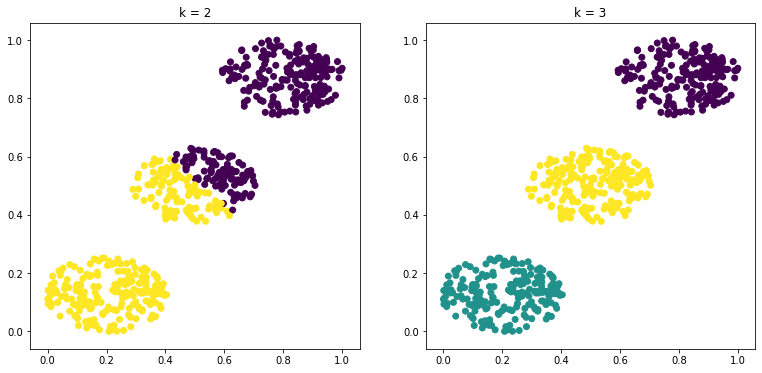

In [4]:
km2 = KMeans(n_clusters=2, random_state=0)
km2 = km2.fit(df)
km2_labels = km2.labels_

km3 = KMeans(n_clusters=3, random_state=0)
km3 = km3.fit(df)
km3_labels = km3.labels_


plt.figure(figsize=(13,6))

plt.subplot(121)
plt.title('k = 2')
plt.scatter(df['x1'], df['x2'], c=km2_labels)

plt.subplot(122)
plt.title('k = 3')
plt.scatter(df['x1'], df['x2'], c=km3_labels)
plt.show()

##### __(b) Calculate the silhouette coefficient for both of your cluster results (`k=2` and `k=3`). Decide which clustering is better based on your result.__

In [5]:
shs2 = silhouette_score(df, km2_labels)
shs3 = silhouette_score(df, km3_labels)

print('Silhouette Scores\n k=2: {:.4f}\n k=3: {:.4f}'.format(shs2, shs3))

# Since the silhouette score for k=3 is greater than for k=2, I would prefer k=3.

Silhouette Scores
 k=2: 0.5553
 k=3: 0.6639


##### __(c) The cluster library allows you to get the silhouette for each individual data points. If a data point has a low silhouette, it is likely not clustered very well. For your cluster with `k = 2` and `k = 2`, plot the whole dataset and color all data points with a silhouette of less than `0.5`.__

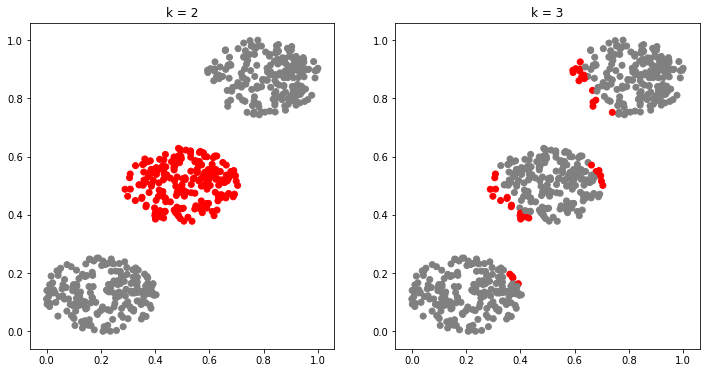

In [6]:
df['s2'] = (silhouette_samples(df[['x1', 'x2']], km2_labels) > 0.5).astype(int)
df['s3'] = (silhouette_samples(df[['x1', 'x2']], km3_labels) > 0.5).astype(int)


plt.figure(figsize=(12,6))
colormap = np.array(['red','grey'])

plt.subplot(121)
plt.title('k = 2')
plt.scatter(df['x1'], df['x2'], c=colormap[df['s2']])

plt.subplot(122)
plt.title('k = 3')
plt.scatter(df['x1'], df['x2'], c=colormap[df['s3']])

plt.show()

> **Interpretation**  
>
> Grey data points represent a clustering with a silhouette of more than (or equal to) 0.5.
> Therefore, these are clustered rather certainly.  
> In contrast to that, red data points have a silhouette of less than 0.5.
> Therefore, these may be clustered not very well.  
>
> As one can see, the k=2 clustering is not very precise and the middle cluster of data points is correctly
> classified as uncertain.  
> In k=3, only the most outer points of each cluster are rather uncertain, which could be expected.  
> All in all, this further demonstrates, that k=3 should be preferred in this.

---

#### Exercise 2: Linkage Based Clustering  - _(8 Points)_ 

Use `single` and `complete` link agglomerative clustering to group the data described by the following distance matrix. Explain your steps for each linkage and show the dendrogram. Do not use Python for this exercise - compute this by hand.

_(Hint: you can use the ``![](imagename.png)`` to include a image in a markdown cell. You can use this to include a hand written calculation. Do not forget to also upload the image in your final submission.)_

||A|B|C|D|
|---|---|---|---|---|
|A|0|3|5|4|
|B| |0|2|6|
|C| | |0|1|
|D| | | |0|

![](Graphs/Ass07_LinkageBased.jpg)

---

#### Exercise 3: DBSCAN  - _(6 Points)_ 

Given the following 2-dimensional dataset. Apply the DBSCAN algorithm to cluster the data using the following input parameters. 

|X|Y|
|---|---|
|3|1|
|3|2|
|4|2|
|4|3|
|5|3|
|6|4|
|7|4|
|8|5|
|9|7|
|1|3|
|2|4|
|2|5|
|3|6|
|4|6|
|5|7|
|5|8|
|6|8|
|7|8|
|7|9|

Do not use Python for this exercise - compute this by hand. Describe briefly the individual steps you need to cluster. 

_(Hint: you can use the ``![](imagename.png)`` to include a image in a markdown cell. You can use this to include a hand written calculation. Do not forget to also upload the image in your final submission.)_

> **Method**  
>
> Check for every datapoint, if there are at least [MinPts] within a distance of [e].
> If yes, this is a core-object.  
> Check for every remaining datapoint, whether it is a border-object,
> e.g. if a core-object is within [e] (but not at least [MinPts]).

##### __(a) `ε = 1.2` and `MinPts = 3`.__  
##### __(b) `ε = 1.5` and `MinPts = 3`.__

![](Graphs/Ass07_DBSCAN.jpg)

---